In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [6]:
Auto = pd.read_csv("F:\Machine_Learning_or_deep_learning\ISLP Book Files\Chapter-3\Datasets\Auto.csv", na_values=["?"])
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [7]:
Auto.dropna(inplace=True)
Auto.shape

(392, 9)

# 9(a)

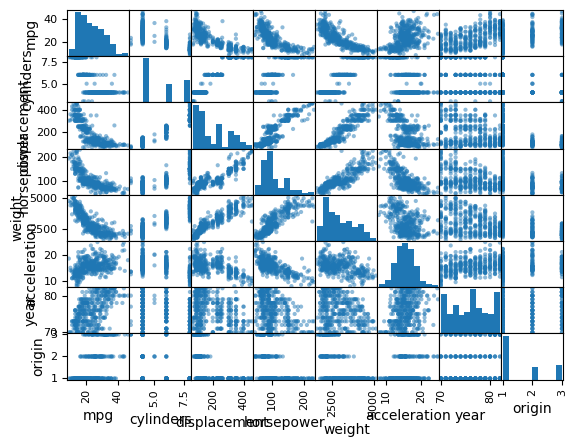

In [9]:
pd.plotting.scatter_matrix(Auto);

# 9(b)

In [10]:
Auto.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_1928\340684133.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Auto.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [11]:
Auto_new = Auto.set_index("name")
Auto_new

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1


# 9(c)

In [91]:
X = Auto.drop(["mpg", "name"], axis=1)
X.reset_index(drop=True, inplace=True) # to reset index back to from 0 to 391
X = pd.concat([pd.DataFrame({"intercept":np.ones(Auto.shape[0])}), X], axis=1)
X#merge intercept column on left

,intercept,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,1.0,8,307.0,130.0,3504,12.0,70,1
1,1.0,8,350.0,165.0,3693,11.5,70,1
2,1.0,8,318.0,150.0,3436,11.0,70,1
3,1.0,8,304.0,150.0,3433,12.0,70,1
4,1.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
387,1.0,4,140.0,86.0,2790,15.6,82,1
388,1.0,4,97.0,52.0,2130,24.6,82,2
389,1.0,4,135.0,84.0,2295,11.6,82,1
390,1.0,4,120.0,79.0,2625,18.6,82,1


In [38]:
y = Auto["mpg"]
y.reset_index(drop=True, inplace=True)
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [39]:
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          2.04e-139
Time:                        21:09:30   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [47]:
anova_lm(results)

AttributeError: 'PandasData' object has no attribute 'design_info'

8(a):-
(i) Yes, there is a relationship between the predictors and the response, because F-statistic is pretty high at 252.4.
(ii) (intercept), weight, year and origin and partially displacement.
(iii) after every year, mpg increases by 0.75.

# 9(d)

13


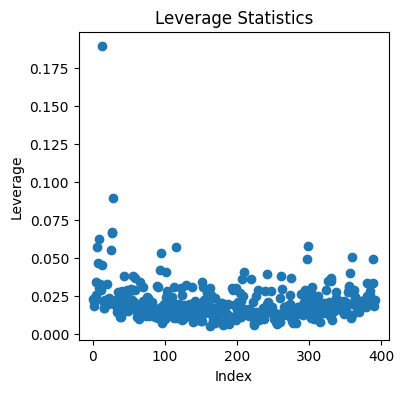

In [53]:
# making leverage statistics plot
infl = results.get_influence()
ax = plt.subplots(figsize=(4, 4))[1]
ax.scatter(np.arange(Auto.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage")
ax.set_title("Leverage Statistics");
index = np.argmax(infl.hat_matrix_diag)
print(index)

In above plot, we can see that 13th index example has high leverage

In [54]:
residual_err = Auto["mpg"]-results.predict(X)
residual_err

0      2.999041
1      1.000701
2      2.759553
3      0.938094
4      2.032822
         ...   
387   -1.319554
388    9.535428
389    0.863674
390   -1.350244
391    2.271079
Length: 392, dtype: float64

Text(0, 0.5, 'Residual Error')

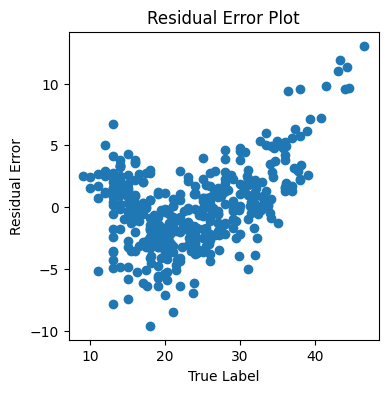

In [55]:
# Plotting residual error plot
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(Auto["mpg"], residual_err)
ax.set_title("Residual Error Plot")
ax.set_xlabel("True Label")
ax.set_ylabel("Residual Error")

From above plot, we can conclude that the true relationship between predictors and response in non-linear

Now for detecting outliers:-

In [56]:
# to make studentized plot, need to determine std_error for every Training_example
outlier_test = results.outlier_test()
outlier_test["student_resid"]

0      0.911694
1      0.303123
2      0.838033
3      0.284757
4      0.618443
         ...   
387   -0.400051
388    2.968385
389    0.263679
390   -0.409047
391    0.689682
Name: student_resid, Length: 392, dtype: float64

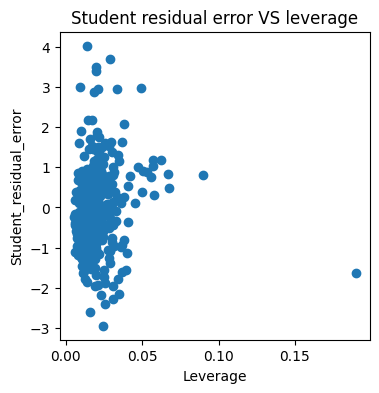

In [58]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(infl.hat_matrix_diag, outlier_test["student_resid"])
ax.set_xlabel("Leverage")
ax.set_ylabel("Student_residual_error")
ax.set_title("Student residual error VS leverage");

From above we can conclude, that there are no unusually large outliers but there is one unusually high leverage point.

# 9(e)

Now, adding some interaction terms and identifying if their contribution is significant.

In [69]:
temp = Auto.drop(["mpg", "name"], axis=1)
temp.reset_index(drop=True, inplace=True)
vals = [VIF(temp, i) for i in range(temp.shape[1])]
vif = pd.DataFrame({"vif":vals}, index=temp.columns[:])
vif

,vif
cylinders,117.708547
displacement,96.909762
horsepower,67.072154
weight,139.454162
acceleration,69.699769
year,115.794614
origin,8.469942


In [93]:
X_temp=X.copy(deep=True)
X_temp

,intercept,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,1.0,8,307.0,130.0,3504,12.0,70,1
1,1.0,8,350.0,165.0,3693,11.5,70,1
2,1.0,8,318.0,150.0,3436,11.0,70,1
3,1.0,8,304.0,150.0,3433,12.0,70,1
4,1.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
387,1.0,4,140.0,86.0,2790,15.6,82,1
388,1.0,4,97.0,52.0,2130,24.6,82,2
389,1.0,4,135.0,84.0,2295,11.6,82,1
390,1.0,4,120.0,79.0,2625,18.6,82,1


In [94]:
X_temp["cylinders_displacement"] = X_temp["cylinders"]*X_temp["displacement"]
results1 = sm.OLS(y, X_temp).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     264.1
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          9.73e-151
Time:                        22:44:21   Log-Likelihood:                -993.83
No. Observations:                 392   AIC:                             2006.
Df Residuals:                     383   BIC:                             2041.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                 -2.7097      4.686     -0.578      0.563     -11.923       6.504
cylinders                 -2.6962      0.409     -6.584      0.000      -3.501      -1.891
displacement              -0.0775      0.014     -5.474      0.000      -0.105      -0.050
horsepower                -0.0476      0.013     -3.559      0.000      -0.074      -0.021
weight                    -0.0052      0.001     -8.370      0.000      -0.006      -0.004
acceleration               0.0598      0.092      0.651      0.515      -0.121       0.240
year                       0.7595      0.047     16.044      0.000       0.666       0.853
origin                     0.7087      0.274      2.590      0.010       0.171       1.247
cylinders_displacement     0.0136      0.002      7.907      0.000       0.010       0.017
==============================================================================
Omnibus:                       35.211   Durbin-Watson:                   1.456
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.581
Skew:                           0.432   Prob(JB):                     5.82e-20
Kurtosis:                       5.162   Cond. No.                     1.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
X_temp["horsepower_acceleration"] = X_temp["horsepower"]*X_temp["acceleration"]
results2 = sm.OLS(y, X_temp).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     247.4
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          2.22e-153
Time:                        22:46:51   Log-Likelihood:                -984.67
No. Observations:                 392   AIC:                             1989.
Df Residuals:                     382   BIC:                             2029.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                 -16.0058      5.538     -2.890      0.004     -26.896      -5.116
cylinders                  -1.8164      0.450     -4.034      0.000      -2.702      -0.931
displacement               -0.0732      0.014     -5.277      0.000      -0.101      -0.046
horsepower                  0.0536      0.027      1.982      0.048       0.000       0.107
weight                     -0.0039      0.001     -5.645      0.000      -0.005      -0.003
acceleration                0.6543      0.165      3.954      0.000       0.329       0.980
year                        0.7608      0.046     16.432      0.000       0.670       0.852
origin                      0.6175      0.269      2.299      0.022       0.089       1.146
cylinders_displacement      0.0105      0.002      5.727      0.000       0.007       0.014
horsepower_acceleration    -0.0079      0.002     -4.277      0.000      -0.012      -0.004
==============================================================================
Omnibus:                       27.241   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.553
Skew:                           0.333   Prob(JB):                     9.60e-15
Kurtosis:                       4.873   Cond. No.                     1.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

e:\Program Files\anaconda\envs\islp\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])
e:\Program Files\anaconda\envs\islp\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
e:\Program Files\anaconda\envs\islp\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
e:\Program Files\anaconda\envs\islp\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:116: RuntimeWarning: invalid value encountered in divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])
posx and posy should be finite values
posx and posy should be finite val

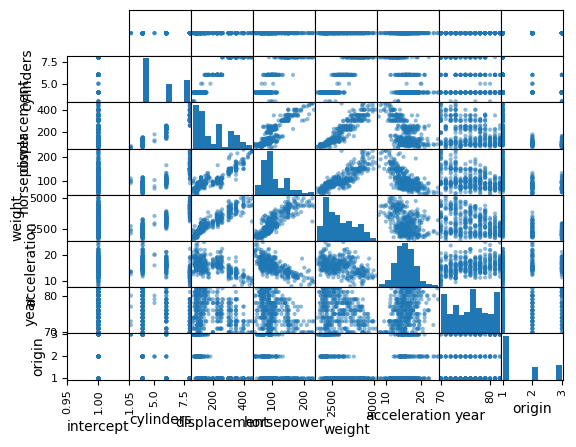

In [97]:
pd.plotting.scatter_matrix(X);

In [100]:
X_temp

,intercept,cylinders,displacement,horsepower,weight,acceleration,year,origin,cylinders_displacement,horsepower_acceleration
0,1.0,8,307.0,130.0,3504,12.0,70,1,2456.0,1560.0
1,1.0,8,350.0,165.0,3693,11.5,70,1,2800.0,1897.5
2,1.0,8,318.0,150.0,3436,11.0,70,1,2544.0,1650.0
3,1.0,8,304.0,150.0,3433,12.0,70,1,2432.0,1800.0
4,1.0,8,302.0,140.0,3449,10.5,70,1,2416.0,1470.0
...,...,...,...,...,...,...,...,...,...,...
387,1.0,4,140.0,86.0,2790,15.6,82,1,560.0,1341.6
388,1.0,4,97.0,52.0,2130,24.6,82,2,388.0,1279.2
389,1.0,4,135.0,84.0,2295,11.6,82,1,540.0,974.4
390,1.0,4,120.0,79.0,2625,18.6,82,1,480.0,1469.4


Hence, we can conclude that interaction term between (cylinders, displacement) and (horsepower,acceleration) is significant.

# 9(f)

To try with log(X), root(X), X**2

e:\Program Files\anaconda\envs\islp\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])
e:\Program Files\anaconda\envs\islp\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
e:\Program Files\anaconda\envs\islp\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
e:\Program Files\anaconda\envs\islp\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:116: RuntimeWarning: invalid value encountered in divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])
posx and posy should be finite values
posx and posy should be finite val

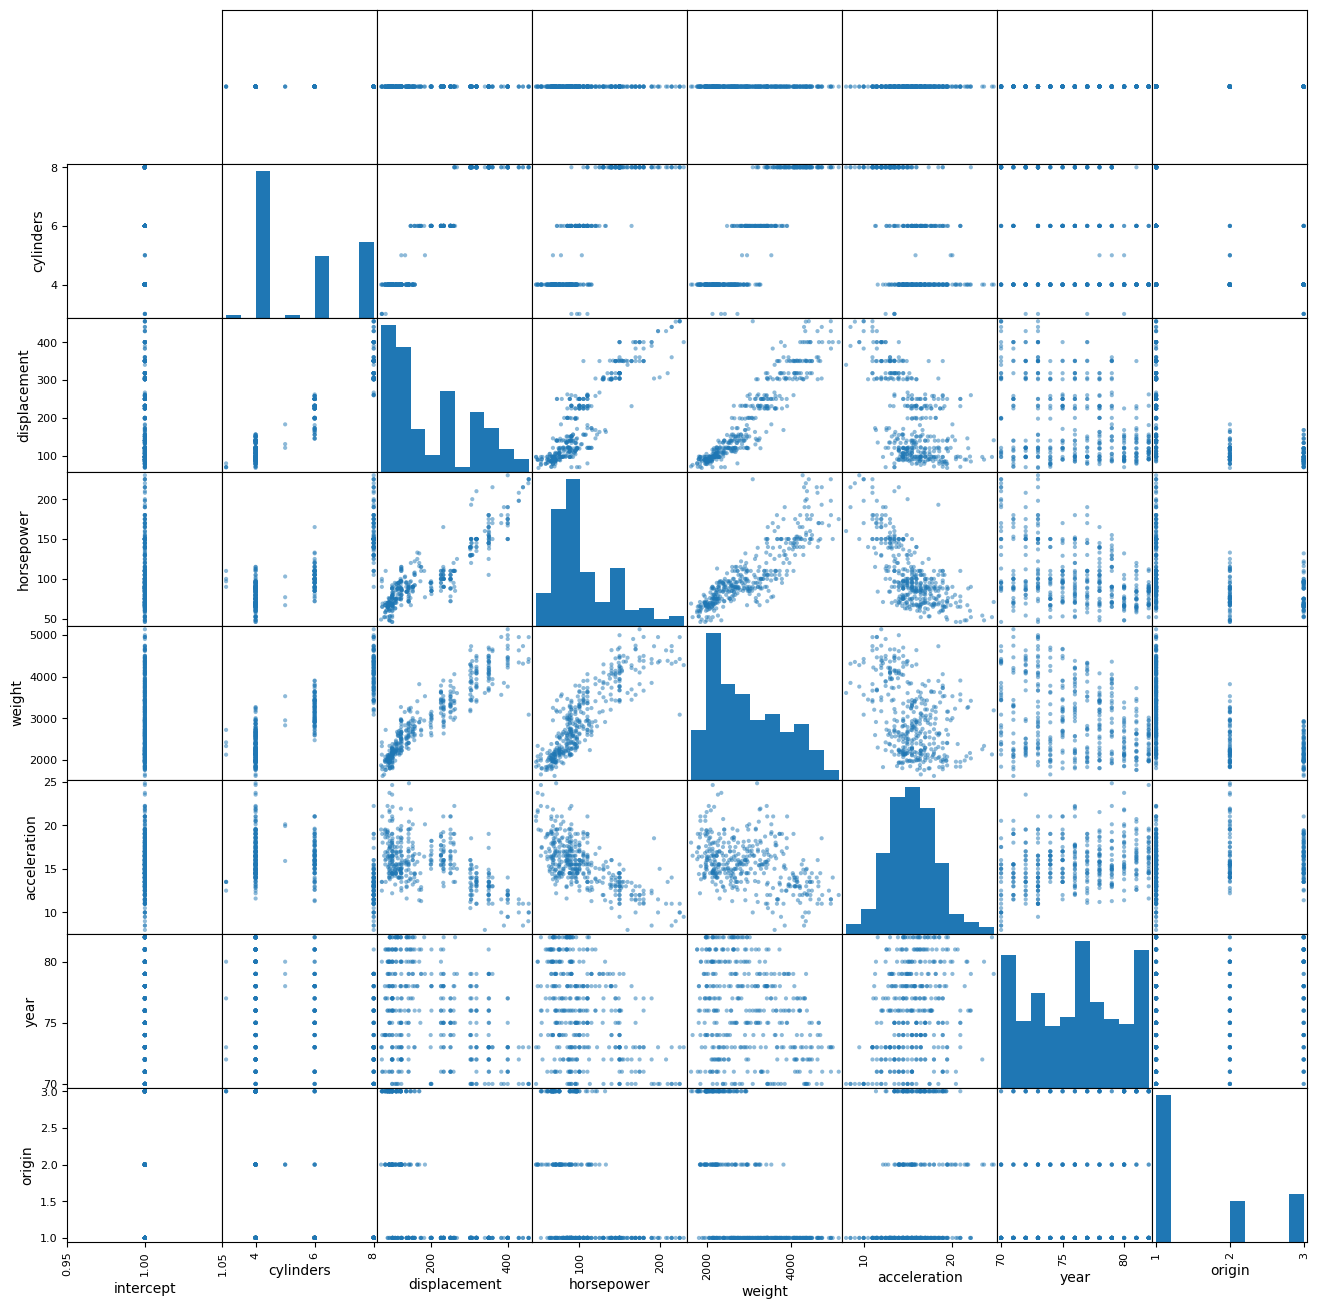

In [102]:
pd.plotting.scatter_matrix(X, figsize=(16, 16));

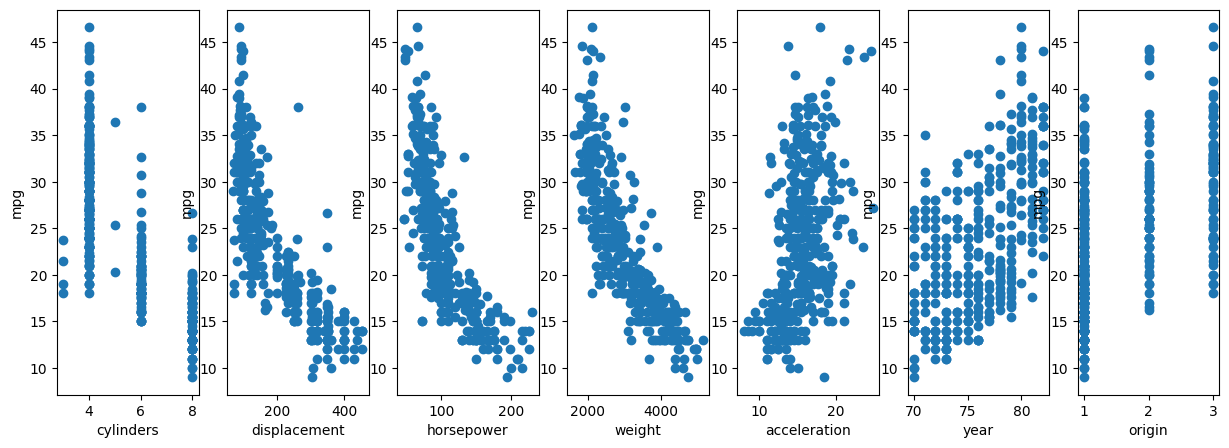

In [121]:
fig, axes=plt.subplots(1, 7, figsize=(15, 5))
for i in range(1, 8):
    axes[i-1].scatter(X.iloc[:, i], y)
    axes[i-1].set_xlabel(f"{Auto.columns[i]}")
    axes[i-1].set_ylabel("mpg")

In [116]:
X.iloc[:, 1]

0      8
1      8
2      8
3      8
4      8
      ..
387    4
388    4
389    4
390    4
391    4
Name: cylinders, Length: 392, dtype: int64

In [123]:
# By watchin above plots, we need to add quadratic of displacement, horsepower, weight, acceleration
X_1 = X.copy(deep=True)
X_1["displacement_quad"]=X["displacement"]**2
X_1["horsepower_quad"]=X["horsepower"]**2
X_1["weight_quad"]=X["weight"]**2
X_1["acceleration_quad"]=X["acceleration"]**2

In [124]:
X_1

,intercept,cylinders,displacement,horsepower,weight,acceleration,year,origin,displacement_quad,horsepower_quad,weight_quad,acceleration_quad
0,1.0,8,307.0,130.0,3504,12.0,70,1,94249.0,16900.0,12278016,144.00
1,1.0,8,350.0,165.0,3693,11.5,70,1,122500.0,27225.0,13638249,132.25
2,1.0,8,318.0,150.0,3436,11.0,70,1,101124.0,22500.0,11806096,121.00
3,1.0,8,304.0,150.0,3433,12.0,70,1,92416.0,22500.0,11785489,144.00
4,1.0,8,302.0,140.0,3449,10.5,70,1,91204.0,19600.0,11895601,110.25
...,...,...,...,...,...,...,...,...,...,...,...,...
387,1.0,4,140.0,86.0,2790,15.6,82,1,19600.0,7396.0,7784100,243.36
388,1.0,4,97.0,52.0,2130,24.6,82,2,9409.0,2704.0,4536900,605.16
389,1.0,4,135.0,84.0,2295,11.6,82,1,18225.0,7056.0,5267025,134.56
390,1.0,4,120.0,79.0,2625,18.6,82,1,14400.0,6241.0,6890625,345.96


In [125]:
results4 = sm.OLS(y, X_1).fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.75e-160
Time:                        01:03:51   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            20.1084      6.696      3.003      0.003       6.943      33.274
cylinders             0.2519      0.326      0.773      0.440      -0.389       0.893
displacement         -0.0169      0.020     -0.828      0.408      -0.057       0.023
horsepower           -0.1635      0.041     -3.971      0.000      -0.244      -0.083
weight               -0.0136      0.003     -5.069      0.000      -0.019      -0.008
acceleration         -2.0884      0.557     -3.752      0.000      -3.183      -0.994
year                  0.7810      0.045     17.512      0.000       0.693       0.869
origin                0.6104      0.263      2.320      0.021       0.093       1.128
displacement_quad  2.257e-05   3.61e-05      0.626      0.532   -4.83e-05    9.35e-05
horsepower_quad       0.0004      0.000      2.943      0.003       0.000       0.001
weight_quad        1.514e-06   3.69e-07      4.105      0.000    7.89e-07    2.24e-06
acceleration_quad     0.0576      0.016      3.496      0.001       0.025       0.090
==============================================================================
Omnibus:                       33.614   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.985
Skew:                           0.438   Prob(JB):                     1.16e-17
Kurtosis:                       5.002   Cond. No.                     5.13e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
# displacement quad doesn't have significance
X_1.drop(["displacement_quad"], axis=1, inplace=True)

In [127]:
X_1["cylinders_displacement"] = X_1["cylinders"]*X_1["displacement"]
X_1["horsepower_acceleration"] = X_1["horsepower"]*X_1["acceleration"]

In [128]:
X_1

,intercept,cylinders,displacement,horsepower,weight,acceleration,year,origin,horsepower_quad,weight_quad,acceleration_quad,cylinders_displacement,horsepower_acceleration
0,1.0,8,307.0,130.0,3504,12.0,70,1,16900.0,12278016,144.00,2456.0,1560.0
1,1.0,8,350.0,165.0,3693,11.5,70,1,27225.0,13638249,132.25,2800.0,1897.5
2,1.0,8,318.0,150.0,3436,11.0,70,1,22500.0,11806096,121.00,2544.0,1650.0
3,1.0,8,304.0,150.0,3433,12.0,70,1,22500.0,11785489,144.00,2432.0,1800.0
4,1.0,8,302.0,140.0,3449,10.5,70,1,19600.0,11895601,110.25,2416.0,1470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,1.0,4,140.0,86.0,2790,15.6,82,1,7396.0,7784100,243.36,560.0,1341.6
388,1.0,4,97.0,52.0,2130,24.6,82,2,2704.0,4536900,605.16,388.0,1279.2
389,1.0,4,135.0,84.0,2295,11.6,82,1,7056.0,5267025,134.56,540.0,974.4
390,1.0,4,120.0,79.0,2625,18.6,82,1,6241.0,6890625,345.96,480.0,1469.4


In [129]:
results5 = sm.OLS(y, X_1).fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     210.5
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.64e-159
Time:                        01:06:31   Log-Likelihood:                -961.99
No. Observations:                 392   AIC:                             1950.
Df Residuals:                     379   BIC:                             2002.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                  17.0222     12.045      1.413      0.158      -6.661      40.705
cylinders                   0.0028      0.520      0.005      0.996      -1.019       1.025
displacement               -0.0125      0.017     -0.730      0.466      -0.046       0.021
horsepower                 -0.1389      0.083     -1.677      0.094      -0.302       0.024
weight                     -0.0140      0.003     -5.219      0.000      -0.019      -0.009
acceleration               -1.7447      1.019     -1.712      0.088      -3.749       0.259
year                        0.7823      0.045     17.427      0.000       0.694       0.871
origin                      0.6206      0.258      2.409      0.016       0.114       1.127
horsepower_quad             0.0004      0.000      2.379      0.018    6.88e-05       0.001
weight_quad              1.578e-06   3.77e-07      4.183      0.000    8.36e-07    2.32e-06
acceleration_quad           0.0510      0.023      2.170      0.031       0.005       0.097
cylinders_displacement      0.0010      0.002      0.415      0.678      -0.004       0.006
horsepower_acceleration    -0.0014      0.003     -0.425      0.671      -0.008       0.005
==============================================================================
Omnibus:                       33.614   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.060
Skew:                           0.438   Prob(JB):                     1.12e-17
Kurtosis:                       5.003   Cond. No.                     9.22e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.22e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
# above interaction terms insignificant
X_1.drop(["cylinders_displacement", "horsepower_acceleration"], axis=1, inplace=True)

In [132]:
X_1.columns

Index(['intercept', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'horsepower_quad', 'weight_quad',
       'acceleration_quad'],
      dtype='object')

In [133]:
vals = [VIF(X_1, i) for i in range(1, len(X_1.columns))]
vif = pd.DataFrame({"vif":vals}, index=X_1.columns[1:])
vif

,vif
cylinders,11.932569
displacement,27.260878
horsepower,117.301135
weight,154.051082
acceleration,100.768977
year,1.285292
origin,1.928816
horsepower_quad,83.925525
weight_quad,116.622816
acceleration_quad,91.398847


### Can improve the model, but for non-linear terms of predictor variables in 9(f), it seems to perform well